In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [17]:
data=pd.read_csv('./hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
data.rename(columns = {'instant':'index', 'dteday':'datetime',
'yr':'year', 'mnth':'month', 'holiday':'is_holiday',
'workingday':'is_workingday','weathersit':'weather_conditions','hum':'humidity','hr':'hour', 'cnt':'count'}, inplace = True)

data.head()

,index,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
data.drop(['index','casual','registered'], axis=1, inplace= True)

In [29]:
data['datetime']=pd.to_datetime(data.datetime)

In [33]:
#converting categorical variables 
data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['hour']=data.hour.astype('category')
data['is_holiday']=data.is_holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['is_workingday']=data.is_workingday.astype('category')
data['weather_conditions']=data.weather_conditions.astype('category')

In [51]:
plt.figure(figsize= (8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

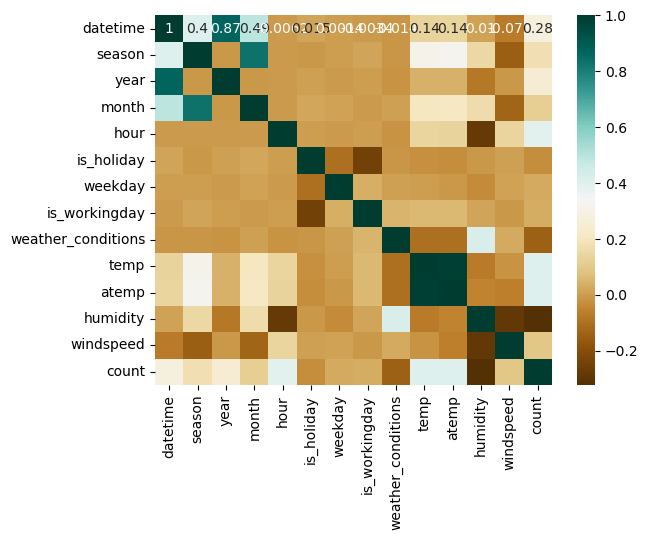

In [53]:
sns.heatmap(data.corr(),annot=True, cmap= 'BrBG')

In [59]:
data.drop(['atemp'], inplace=True, axis = 1)

In [61]:
data.head()

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_conditions,temp,humidity,windspeed,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [63]:
data.drop(['datetime'], inplace = True, axis = 1)


In [65]:
y = data['count']

In [69]:
x=data.drop('count', axis= 1)

In [75]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.20)

In [79]:
# linear regreassion
model = LinearRegression()
model.fit(x_train , y_train)
predict=model.predict (x_test) 
mse = sklearn.metrics.mean_squared_error(y_test, predict)
rmse = math.sqrt(mse)
print(rmse)

142.9282292181785


In [90]:
# random forest regressor
model2 = RandomForestRegressor(n_estimators = 200, max_depth = 15)
model2.fit(x_train, y_train)
pred = model2.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

44.1812429069392


In [ ]:
# pipeline creation
pipeline = Pipeline(steps = [('model',model2)])

model = pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)
print(math.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))